<a href="https://colab.research.google.com/github/AntonioCuba123/skills-introduction-to-github/blob/main/Predicci%C3%B3n_demanda_calzado_deportivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
MSE: 519.13
MAE: 18.22
R2 Score: 0.87


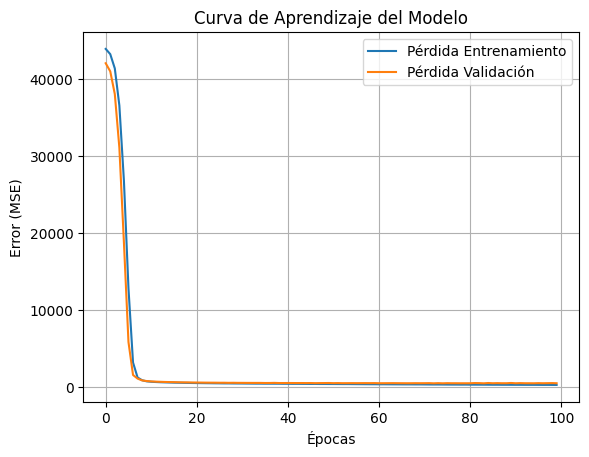

In [1]:
# ========================================
# 1. Importar librerías
# ========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# ========================================
# 2. Simulación de datos históricos
# ========================================
np.random.seed(42)
n = 1000

data = pd.DataFrame({
    'temporada': np.random.choice(['verano', 'invierno'], size=n),
    'tipo_zapatilla': np.random.choice(['running', 'training', 'casual'], size=n),
    'precio': np.random.uniform(50, 200, size=n),
    'marketing_activo': np.random.choice([0, 1], size=n),
    'ventas_previas': np.random.randint(20, 500, size=n),
    'reseñas': np.random.uniform(2.0, 5.0, size=n),
    'inventario': np.random.randint(50, 300, size=n),
    'evento_deportivo': np.random.choice([0, 1], size=n),
    'clima_frio': np.random.choice([0, 1], size=n),
    'feriado': np.random.choice([0, 1], size=n)
})

# ========================================
# 3. One Hot Encoding de variables categóricas
# ========================================
data = pd.get_dummies(data, columns=['temporada', 'tipo_zapatilla'], drop_first=True)

# ========================================
# 4. Crear variable objetivo con lógica de negocio
# ========================================
data['ventas_mes'] = (
    0.6 * data['precio'] +
    12 * data['marketing_activo'] +
    0.35 * data['ventas_previas'] +
    18 * data['reseñas'] -
    0.25 * data['inventario'] +
    10 * data['evento_deportivo'] +
    5 * data['clima_frio'] +
    7 * data['feriado'] +
    np.random.normal(0, 20, size=n)
)

# ========================================
# 5. Separar variables predictoras y objetivo
# ========================================
X = data.drop('ventas_mes', axis=1)
y = data['ventas_mes']

# ========================================
# 6. Normalizar datos
# ========================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ========================================
# 7. Dividir datos en entrenamiento y prueba
# ========================================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# ========================================
# 8. Definir modelo de red neuronal
# ========================================
model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

# ========================================
# 9. Compilar el modelo
# ========================================
model.compile(optimizer='adam', loss='mse')

# ========================================
# 10. Entrenar el modelo
# ========================================
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)

# ========================================
# 11. Evaluar el rendimiento
# ========================================
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2 Score: {r2:.2f}")

# ========================================
# 12. Visualizar el aprendizaje del modelo
# ========================================
plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida Validación')
plt.title("Curva de Aprendizaje del Modelo")
plt.xlabel("Épocas")
plt.ylabel("Error (MSE)")
plt.legend()
plt.grid(True)
plt.show()